In [1]:
import os
import cv2
import matplotlib.pyplot as plt

## main directory

In [2]:
directory="../input/plant-village/PlantVillage"

## folder loc for each

In [3]:
potato_healthy=os.path.join(directory,'Potato___healthy')
Potato_Late_blight=os.path.join(directory,'Potato___Late_blight')
Potato_Early_blight=os.path.join(directory,'Potato___Early_blight')

## images of each folder

In [4]:
healthy_imgs=os.listdir(potato_healthy)
healthy_imgs[0]

'7948ada9-eabc-4cb7-a579-b73e938eb716___RS_HL 4185.JPG'

In [5]:
Late_blight_imgs=os.listdir(Potato_Late_blight)
Potato_Early_blight_imgs=os.listdir(Potato_Early_blight)

## now get the whole path of all folders with images

In [6]:
healthy_path=[]
for x in healthy_imgs:
    healthy_path.append(potato_healthy+'/'+x)
    
Late_blight=[]
for x in Late_blight_imgs:
    Late_blight.append(Potato_Late_blight+'/'+x)   
    
Early_blight=[]
for x in Potato_Early_blight_imgs:
    Early_blight.append(Potato_Early_blight+'/'+x)
    

## now label them
### 0=healthy
### 1 =late blight
### 2 = early blight

In [7]:
image_size=100
data=[]
for x in healthy_path:
    img_arr=cv2.imread(x)
    img=cv2.resize(img_arr,(image_size,image_size))
    data.append([img,0])

In [8]:
image_size=100
for x in Late_blight:
    img_arr=cv2.imread(x)
    img=cv2.resize(img_arr,(image_size,image_size))
    data.append([img,1])

In [9]:
image_size=100
for x in Early_blight:
    img_arr=cv2.imread(x)
    img=cv2.resize(img_arr,(image_size,image_size))
    data.append([img,2])

In [10]:
import random
random.shuffle(data)
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)

2


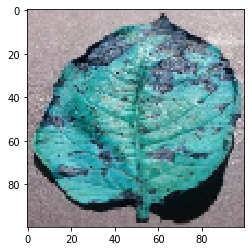

In [11]:
from matplotlib import pyplot as plt
plt.imshow(x[1500], interpolation='nearest')
print(y[1500])
plt.show()

In [12]:
import numpy as np
x=np.array(x)
y=np.array(y)
x=x/255
x.shape

(2152, 100, 100, 3)

In [18]:
from sklearn.model_selection import train_test_split

In [77]:
# Split the train and the validation set for the fitting
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [84]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [103]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model=Sequential()
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='sigmoid',input_dim=x.shape[1:]))
model.add(Dense(units=3,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.fit(x,y,epochs=10,validation_split=0.2)

In [85]:
epochs = 30 # 
batch_size = 86

In [87]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs,
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
20/20 - 5s - loss: 0.0476 - accuracy: 0.9798
Epoch 2/30
20/20 - 5s - loss: 0.0417 - accuracy: 0.9841
Epoch 3/30
20/20 - 4s - loss: 0.0356 - accuracy: 0.9872
Epoch 4/30
20/20 - 4s - loss: 0.0284 - accuracy: 0.9908
Epoch 5/30
20/20 - 5s - loss: 0.0239 - accuracy: 0.9927
Epoch 6/30
20/20 - 5s - loss: 0.0259 - accuracy: 0.9914
Epoch 7/30
20/20 - 5s - loss: 0.0387 - accuracy: 0.9878
Epoch 8/30
20/20 - 5s - loss: 0.0312 - accuracy: 0.9890
Epoch 9/30
20/20 - 5s - loss: 0.0216 - accuracy: 0.9927
Epoch 10/30
20/20 - 6s - loss: 0.0273 - accuracy: 0.9920
Epoch 11/30
20/20 - 5s - loss: 0.0315 - accuracy: 0.9865
Epoch 12/30
20/20 - 4s - loss: 0.0288 - accuracy: 0.9890
Epoch 13/30
20/20 - 4s - loss: 0.0196 - accuracy: 0.9945
Epoch 14/30
20/20 - 5s - loss: 0.0219 - accuracy: 0.9939
Epoch 15/30
20/20 - 5s - loss: 0.0183 - accuracy: 0.9939
Epoch 16/30
20/20 - 5s - loss: 0.0214 - accuracy: 0.9920
Epoch 17/30
20/20 - 5s - loss: 0.0287 - accuracy: 0.9908
Epoch 18/30
20/20 - 4s - loss: 0.0280 - 

In [88]:
y_pred = model.predict(X_test)

In [89]:
y_pred_values=np.argmax(y_pred,axis=1)

In [96]:
import pandas as pd

In [97]:
df=pd.DataFrame({"test":Y_test,"predicted":y_pred_values})
df

,test,predicted
0,1,1
1,2,2
2,2,2
3,1,1
4,2,2
...,...,...
426,2,2
427,1,1
428,2,2
429,1,1
